<a href="https://colab.research.google.com/github/UnaRam/pythonFundamemtals/blob/main/Una__8_1_Correlation_with_linregress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Describing the data relatively and visually
---

This worksheet introduces **scipy** library

A library of functions for interpolating, optimising, linear regression, etc  

---

A dataset will be read into a dataframe, cleaned, wrangled and so prepared for summarising and the telling of stories through visualisations and summaries.

So far we have covered statistical measures over an individual series.  Linear regression reports correlation between the values in two series.

To get the results of a linear regression:  
*  import the `linregress` function from the `scipy.stats` package 
*  run the `linregress` function with the two axes assigning the result to a variable (e.g. `regression`) 

The result of the linregress function is a set of variables:  
*  `slope`, `intercept` - the gradient and y-intercept of the regression line (the line of best fit between the two series) are in `regression.slope` and `regression.intercept`
*  `rvalue` - the correlation coefficient - this indicates how closely the line drawn from the linear regression data fits the actual data, the closer to 1 the better the fit
*  `pvalue` - the probability of error if the regression line is extended to predict
*  the standard error is in `regression.stderr` and is the average distance of each data point from the lineof best fit 


Further information [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)


### Exercise 1 - is age closely related to income?
---

Use linear regression to compare the columns 'Age' and 'Income' in the data set 'Income-Data' at this url:  
https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true  

To do this:
*  import the pandas library  


*  import the **linregress** function from the library **scipy.stats**  (`from scipy.stats import linregress`)  


*  open the Excel file at the url above, using the sheet_name '`county-level`', reading the data into a dataframe called **county_level_df**  


*  create a variable called **x** and assign the '`Age`' column of the `county_level_df` dataframe   


*  create a variable called **y** and assign the '`Income`' column of the `county_level_df` dataframe   


*  create a variable called **regression** and assign the result of running the linregress function with `x`, `y` as its parameters ( `linregress(x,y)` )   


*  display the regression  
(*Expected output:  LinregressResult(slope=-0.31433084434233205, intercept=72.78388856978748, rvalue=-0.14787411576068246, pvalue=0.5581637648902298, stderr=0.5255739814332189*)  


*  display the slope (`regression.slope`)  
(*Expected output: -0.31433084434233205 - this indicates that the line plotting Age against Income slopes downward implying that income reduces with age*)  


*  display the intercept (`regression.intercept`)  
(*Expected output: 72.78388856978748 - this indicates that income level starts at 72.78388856978748 and reduces from there by age*)    


*  display the rvalue (which indicates how closely income follows age and whether it goes up as age goes up or goes down as age goes up 

In [35]:
import pandas as pd
from scipy.stats import linregress

url = "https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true"
county_level_df = pd.read_excel(url, sheet_name='county-level')
county_level_df

def calc_regression(df,col1,col2):
    x = df[col1]
    y = df[col2]
    regression = linregress(x,y)
    # print(regression)
    # print("\nSlope:\t",round(regression.slope,3))
    slope = regression.slope
    # print("\nIntercept:\t",round(regression.intercept,1))
    intercept = regression.intercept
    # print("\nRValue:\t",round(regression.rvalue,3))
    rval = regression.rvalue
    rsq = rval**2
    print("\nRsquared:\t",round(rsq,6))
    # print("\npval:\t",regression.pvalue)
    pvalue = regression.pvalue
    return slope,intercept,pvalue

calc_regression(county_level_df,'Age','Income')


Rsquared:	 0.021867


(-0.31433084434233205, 72.78388856978748, 0.5581637648902298)

### Exercise 2 - Could Population predict Income?  
---

Repeat the steps in exercise 1 to see if there is a clearer correlation between Population and Income.  

Add a statement in the text cell to describe your findings.

**Expected output**:   
0.013558605755058871


In [36]:
calc_regression(county_level_df,'Population','Income')


Rsquared:	 0.013559


(0.05737132629483762, 60.95698211316883, 0.6454275157910035)

### Exercise 3 - Does Stress predict Wellbeing?
---

Repeat the steps in Exercises 1 & 2 to see if you can find a statistically significant result.

Add a statement in the text cell to describe your findings

* Read the dataset: "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"

* perform linear regression  
* look at r_squared and pvalue to get an idea of how predictive and significant these variables are

* save slope and intercepts in variables for later 

Challenge:  
Write a function that checks the significance of a regression and displays a message indicating the result.

**Test output**:  
LinregressResult(slope=-0.6279050248852254, intercept=37.713488379900454, rvalue=-0.6713959740851134, pvalue=6.084540561441803e-07, stderr=0.10694652962765022)  
r sqr = 0.4507725540176983  
model is significant, p < .05:  6.084540561441803e-07  

In [38]:
url = "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
psych_df = pd.read_csv(url)
psych_df

myslope, myintercept, mypvalue = calc_regression(psych_df,'Stress','Wellbeing')
print("returned pvalue:\t",mypvalue)


Rsquared:	 0.450773
returned pvalue:	 6.084540561441803e-07


# Create some charts and make some predictions from regressions

1.  Using what you know from completing the Visualisation worksheets (matplotlib and Seaborn), plot the various regression results in a set of charts.
2.  Use the slope and intercept to calculate a prediction for a reasonable value (e.g. predict an income for a given age using the slope and intercept from the regression to calculate income from the formula `age * slope + intercept`


Rsquared:	 0.450773
slope	 -0.6279050248852254 
intercept	 37.713488379900454
predicted wellness =  15.736812508917566 for stress  35


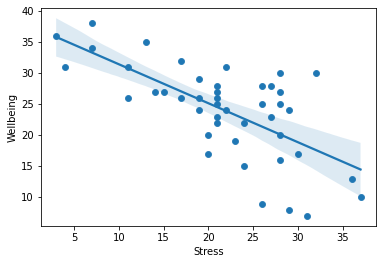

In [69]:
#plot stress vs wellbeing
import seaborn as sns
def scatterplots(df,col1,col2):
  x = df[col1]
  y = df[col2]
  # print(x)
  # print(y)
  chart=sns.scatterplot(x=x, y=y)
  chart=sns.regplot(x=x,y=y)

def predict_it(m,x,c):
  y = m*x + c
  return y

scatterplots(psych_df,'Stress','Wellbeing')
myslope, myintercept, mypvalue = calc_regression(psych_df,'Stress','Wellbeing')
print("slope\t",myslope,"\nintercept\t",myintercept)
input = 35
prediction = predict_it(myslope,input,myintercept)
print("predicted wellness = ",prediction, "for stress ",input)


Rsquared:	 0.013559
predicted income =  66.69411474265259 for population  100


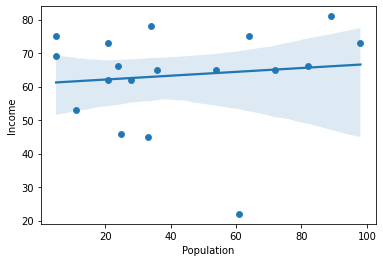

In [64]:
#plot poulation and income
scatterplots(county_level_df,'Population','Income')
myslope, myintercept, mypvalue = calc_regression(county_level_df,'Population','Income')
# print("slope\t",myslope,"\nintercept\t",myintercept)


input = 100
prediction = predict_it(myslope,input,myintercept)
print("predicted income = ",prediction, "for population ",input)



Rsquared:	 0.021867
predicted income =  65.86860999425618 for age  22


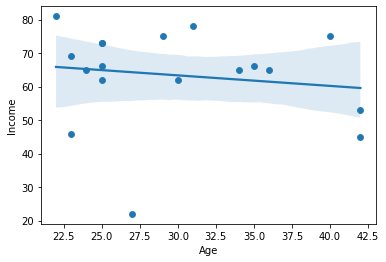

In [72]:
#plot age and income
scatterplots(county_level_df,'Age','Income')
myslope, myintercept, mypvalue = calc_regression(county_level_df,'Age','Income')
# print("slope\t",myslope,"\nintercept\t",myintercept)


input = 22
prediction = predict_it(myslope,input,myintercept)
print("predicted income = ",prediction, "for age ",input)

# Further reference on linear regression

[at statisticalsolutions.com](https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/what-is-linear-regression/)